In [2]:
%run Pre-Processing.ipynb

In [3]:
%run Models.ipynb

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer
from imblearn.over_sampling import ADASYN
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.feature_selection import SelectKBest, f_classif
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

In [5]:
SVM_f1 = dict()
KNN_f1 = dict()
RFC_f1 = dict()
LGBM_f1 = dict()
XGB_f1 = dict()
CB_f1 = dict()

In [6]:
for x in range(71, 10, -10):
    num_feature = x
    print("No of feature", num_feature)
    selector = PCA(n_components=num_feature, random_state=97, )
    X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
    X_test_selected = selector.transform(X_test_transformed)
    SVM_f1[x] = SVM_selector(X_train_selected, y_train_resampled, X_test_selected, y_test)
    KNN_f1[x] = KNN_Classifier(X_train_selected, y_train_resampled, X_test_selected, y_test)
    RFC_f1[x] = RandomForest_Classifier(X_train_selected, y_train_resampled, X_test_selected, y_test)
    LGBM_f1[x] = LGBM_Classifier(X_train_selected, y_train_resampled, X_test_selected, y_test)
    XGB_f1[x] = XGB_Classifier(X_train_selected, y_train_resampled, X_test_selected, y_test)
    CB_f1[x] = CatBoost_Classifier(X_train_selected, y_train_resampled, X_test_selected, y_test)

No of feature 71
SVM Model:-
[LibSVM]

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9368    0.9834    0.9596    103560
      Attack     0.2687    0.0840    0.1280      7496

    accuracy                         0.9227    111056
   macro avg     0.6027    0.5337    0.5438    111056
weighted avg     0.8917    0.9227    0.9034    111056


Confusion Matrix:
[[101845   1715]
 [  6866    630]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9392    0.9025    0.9205    103560
      Attack     0.1255    0.1933    0.1522      7496

    accuracy                         0.8547    111056
   macro avg     0.5324    0.5479    0.5364    111056
weighted avg     0.8843    0.8547    0.8687    111056

Confusion Matrix:
[[93467 10093]
 [ 6047  1449]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   52.5s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  4.9min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.1s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    1.2s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9992    0.8563    0.9222    103560
      Attack     0.3327    0.9900    0.4981      7496

    accuracy                         0.8653    111056
   macro avg     0.6659    0.9231    0.7101    111056
weighted avg     0.9542    0.8653    0.8936    111056

Confusion Matrix:
[[88678 14882]
 [   75  7421]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.103444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 18105
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 71
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
              precision    recall  f1-score   support

      Normal 

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9368    0.9834    0.9596    103560
      Attack     0.2687    0.0840    0.1280      7496

    accuracy                         0.9227    111056
   macro avg     0.6027    0.5337    0.5438    111056
weighted avg     0.8917    0.9227    0.9034    111056


Confusion Matrix:
[[101845   1715]
 [  6866    630]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9392    0.9027    0.9206    103560
      Attack     0.1256    0.1930    0.1522      7496

    accuracy                         0.8548    111056
   macro avg     0.5324    0.5479    0.5364    111056
weighted avg     0.8843    0.8548    0.8687    111056

Confusion Matrix:
[[93486 10074]
 [ 6049  1447]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   49.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.7min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.7s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.7s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9992    0.8561    0.9222    103560
      Attack     0.3327    0.9909    0.4981      7496

    accuracy                         0.8652    111056
   macro avg     0.6660    0.9235    0.7101    111056
weighted avg     0.9542    0.8652    0.8935    111056

Confusion Matrix:
[[88660 14900]
 [   68  7428]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.083618 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15555
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 61
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
              precision    recall  f1-score   support

      Normal 

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9368    0.9834    0.9596    103560
      Attack     0.2685    0.0840    0.1280      7496

    accuracy                         0.9227    111056
   macro avg     0.6027    0.5337    0.5438    111056
weighted avg     0.8917    0.9227    0.9034    111056


Confusion Matrix:
[[101844   1716]
 [  6866    630]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9392    0.9026    0.9206    103560
      Attack     0.1256    0.1933    0.1523      7496

    accuracy                         0.8547    111056
   macro avg     0.5324    0.5480    0.5364    111056
weighted avg     0.8843    0.8547    0.8687    111056

Confusion Matrix:
[[93476 10084]
 [ 6047  1449]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   43.9s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  3.8min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.6s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.7s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9992    0.8561    0.9221    103560
      Attack     0.3326    0.9909    0.4980      7496

    accuracy                         0.8652    111056
   macro avg     0.6659    0.9235    0.7101    111056
weighted avg     0.9542    0.8652    0.8935    111056

Confusion Matrix:
[[88654 14906]
 [   68  7428]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.070628 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 13005
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
              precision    recall  f1-score   support

      Normal 

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9368    0.9834    0.9596    103560
      Attack     0.2683    0.0840    0.1280      7496

    accuracy                         0.9227    111056
   macro avg     0.6026    0.5337    0.5438    111056
weighted avg     0.8917    0.9227    0.9034    111056


Confusion Matrix:
[[101842   1718]
 [  6866    630]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9398    0.9027    0.9209    103560
      Attack     0.1304    0.2017    0.1584      7496

    accuracy                         0.8554    111056
   macro avg     0.5351    0.5522    0.5397    111056
weighted avg     0.8852    0.8554    0.8694    111056

Confusion Matrix:
[[93480 10080]
 [ 5984  1512]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.8min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.5s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.5s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9993    0.8559    0.9221    103560
      Attack     0.3325    0.9916    0.4980      7496

    accuracy                         0.8651    111056
   macro avg     0.6659    0.9238    0.7101    111056
weighted avg     0.9543    0.8651    0.8934    111056

Confusion Matrix:
[[88640 14920]
 [   63  7433]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.069442 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10455
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 41
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
              precision    recall  f1-score   support

      Normal 

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9368    0.9834    0.9595    103560
      Attack     0.2680    0.0840    0.1280      7496

    accuracy                         0.9227    111056
   macro avg     0.6024    0.5337    0.5438    111056
weighted avg     0.8917    0.9227    0.9034    111056


Confusion Matrix:
[[101839   1721]
 [  6866    630]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9398    0.9026    0.9208    103560
      Attack     0.1299    0.2009    0.1578      7496

    accuracy                         0.8553    111056
   macro avg     0.5349    0.5518    0.5393    111056
weighted avg     0.8851    0.8553    0.8693    111056

Confusion Matrix:
[[93475 10085]
 [ 5990  1506]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   26.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  2.3min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.5s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9994    0.8556    0.9219    103560
      Attack     0.3323    0.9928    0.4979      7496

    accuracy                         0.8649    111056
   macro avg     0.6658    0.9242    0.7099    111056
weighted avg     0.9544    0.8649    0.8933    111056

Confusion Matrix:
[[88606 14954]
 [   54  7442]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.045823 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7905
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
              precision    recall  f1-score   support

      Normal  

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9368    0.9832    0.9594    103560
      Attack     0.2657    0.0840    0.1277      7496

    accuracy                         0.9225    111056
   macro avg     0.6013    0.5336    0.5436    111056
weighted avg     0.8915    0.9225    0.9033    111056


Confusion Matrix:
[[101819   1741]
 [  6866    630]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9397    0.9017    0.9203    103560
      Attack     0.1284    0.2000    0.1563      7496

    accuracy                         0.8543    111056
   macro avg     0.5340    0.5508    0.5383    111056
weighted avg     0.8849    0.8543    0.8687    111056

Confusion Matrix:
[[93380 10180]
 [ 5997  1499]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   21.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.8min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.4s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9994    0.8554    0.9218    103560
      Attack     0.3320    0.9925    0.4975      7496

    accuracy                         0.8647    111056
   macro avg     0.6657    0.9240    0.7097    111056
weighted avg     0.9543    0.8647    0.8932    111056

Confusion Matrix:
[[88587 14973]
 [   56  7440]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.035619 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5355
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
              precision    recall  f1-score   support

      Normal  

C:\Users\gauta\anaconda3\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Making predictions...

Classification Report:
              precision    recall  f1-score   support

      Normal     0.9818    0.7537    0.8528    103560
      Attack     0.1917    0.8074    0.3099      7496

    accuracy                         0.7573    111056
   macro avg     0.5868    0.7805    0.5813    111056
weighted avg     0.9285    0.7573    0.8161    111056


Confusion Matrix:
[[78050 25510]
 [ 1444  6052]]
KNN model
Classification Report:
              precision    recall  f1-score   support

      Normal     0.9398    0.9011    0.9200    103560
      Attack     0.1293    0.2029    0.1579      7496

    accuracy                         0.8539    111056
   macro avg     0.5345    0.5520    0.5390    111056
weighted avg     0.8851    0.8539    0.8686    111056

Confusion Matrix:
[[93314 10246]
 [ 5975  1521]]
Random Forest:-


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.3min finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=8)]: Done 200 out of 200 | elapsed:    0.4s finished


Classification Report:
              precision    recall  f1-score   support

      Normal     0.9993    0.8544    0.9212    103560
      Attack     0.3303    0.9921    0.4957      7496

    accuracy                         0.8637    111056
   macro avg     0.6648    0.9233    0.7084    111056
weighted avg     0.9542    0.8637    0.8925    111056

Confusion Matrix:
[[88484 15076]
 [   59  7437]]
LGBM Model:-
[LightGBM] [Info] Number of positive: 83069, number of negative: 414022
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 497091, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.167110 -> initscore=-1.606248
[LightGBM] [Info] Start training from score -1.606248
Classification Report:
              precision    recall  f1-score   support

      Normal  

In [7]:
def print_plot(dictionary):
    keys = list(dictionary.keys())
    values = list(dictionary.values())
    plt.figure(figsize=(8, 6))
    plt.plot(keys, values, marker='o', linestyle='-', color='b')
    plt.xlabel('No of Features')
    plt.ylabel('F1-Score')
    plt.title('No of Features vs F1-Score')
    plt.grid(True)
    plt.show()

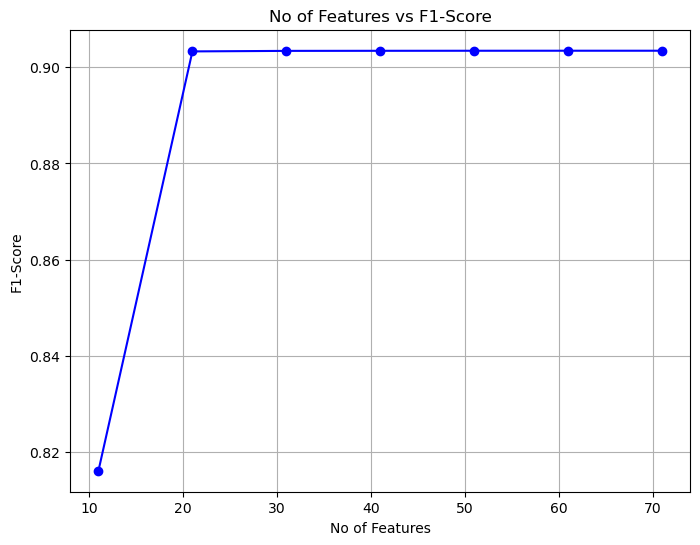

In [8]:
print_plot(SVM_f1)

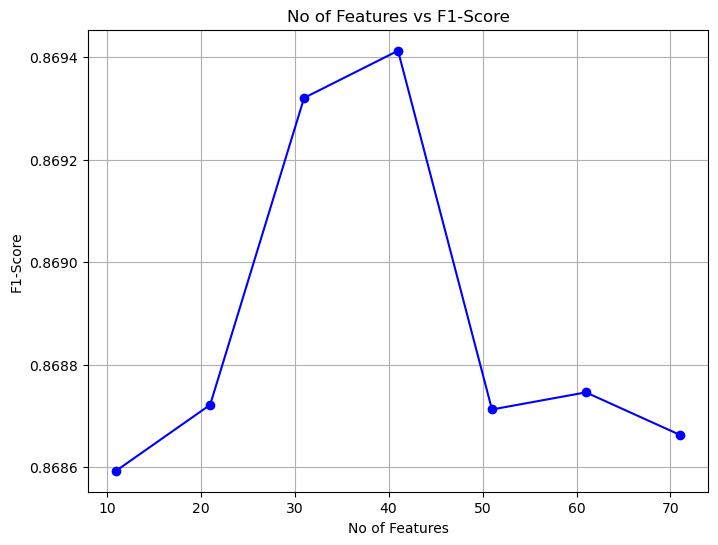

In [9]:
print_plot(KNN_f1)

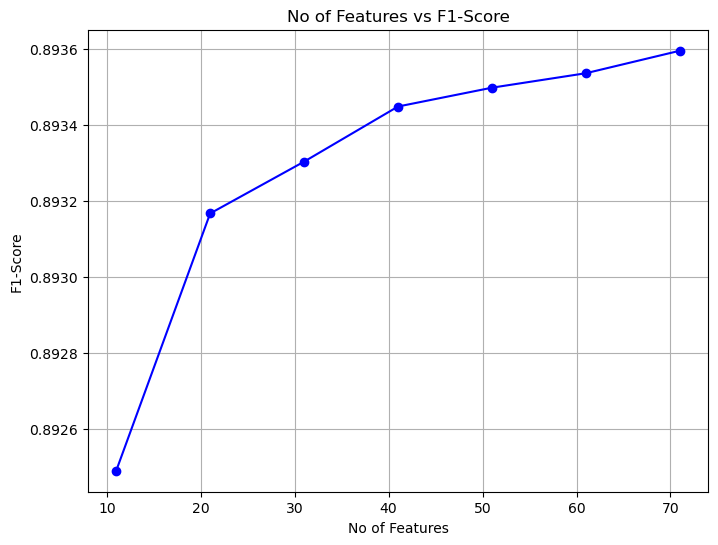

In [10]:
print_plot(RFC_f1)

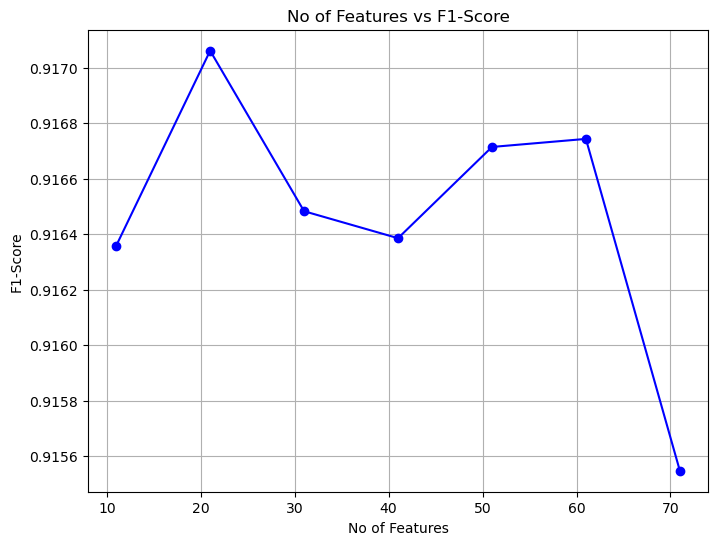

In [11]:
print_plot(LGBM_f1)

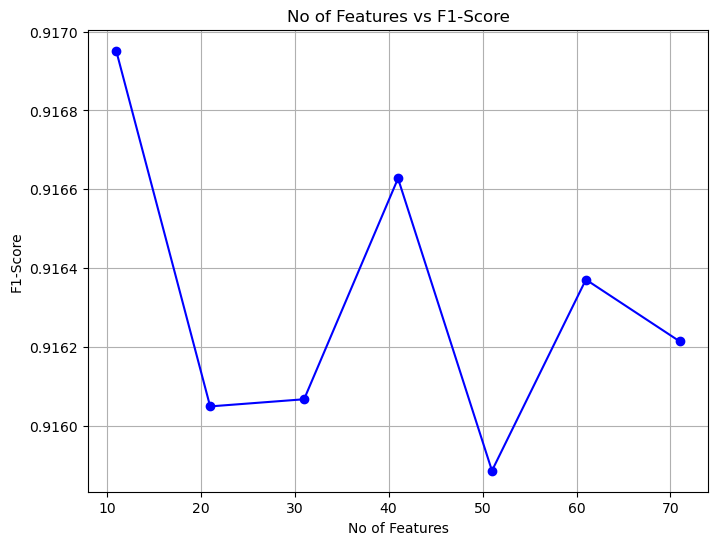

In [12]:
print_plot(XGB_f1)

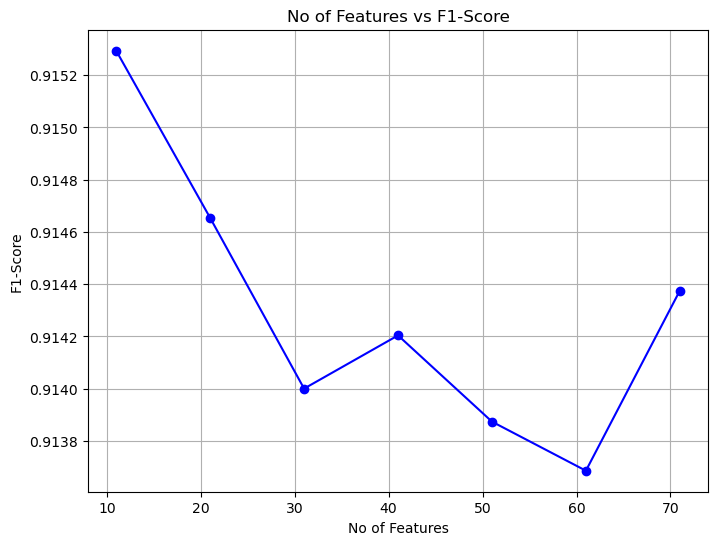

In [13]:
print_plot(CB_f1)